# data

## events

In [73]:
%run -n main.py
names = list(zip_list(DUMP, '*/*.json'))
events = []
for channel, names in group_channels(log_progress(names)):
    items = flatten(zip_read_jsons(DUMP, names))
    events.extend(parse_events(items, channel))

  0%|          | 0/104808 [00:00<?, ?it/s]

## users

In [22]:
%run -n main.py
names = zip_list(DUMP, 'users.json')
items = flatten(zip_read_jsons(DUMP, names))
users = list(log_progress(parse_users(items)))

0it [00:00, ?it/s]

## vacancy messages

In [2]:
%run -n main.py
names = list(zip_list(DUMP, '_jobs/*.json'))
items = flatten(zip_read_jsons(DUMP, log_progress(names)))
messages = sorted(
    parse_messages(items),
    key=lambda _: _.datetime
)

  0%|          | 0/2247 [00:00<?, ?it/s]

In [3]:
%run -n main.py
vacancy_messages = [_ for _ in messages if is_vacancy_message(_)]

In [4]:
len(messages), len(vacancy_messages)

(8811, 4067)

In [5]:
for record in log_progress(vacancy_messages):
    record.html = mrkdwn_html(record.mrkdwn)
    record.text = norm_text(html_text(record.html))

  0%|          | 0/4067 [00:00<?, ?it/s]

In [6]:
%run -n main.py
for record in log_progress(vacancy_messages):
    record.lang = text_lang(record.text)

  0%|          | 0/4067 [00:00<?, ?it/s]

In [194]:
# %run -n main.py
# records = vacancy_messages
# records = [_ for _ in records if _.datetime.year == 2021]
# # records = records[-100:]
# seed(4)
# records = sample(records, 10)

# for index, record in enumerate(records):
#     print(index)
#     print(record.datetime)
#     print(record.text)
#     print()

# parse

In [267]:
# %run -n main.py
# records = vacancy_messages[-1000:]
# seed(1)
# records = sample(records, 100)

# extractor = Extractor()

# for index, record in log_progress(enumerate(records)):
#     matches = list(extractor(record.text))
#     print(index)
#     show_markup(record.text, matches)
#     print('-----\n\n\n')

In [451]:
%run -n main.py
extractor = Extractor()

message_matches = []
for message in log_progress(vacancy_messages):
    matches = list(extractor(message.text))
    message_matches.append([message, matches])

  0%|          | 0/4067 [00:00<?, ?it/s]

# plot

In [38]:
%config InlineBackend.figure_format = 'retina'

## events

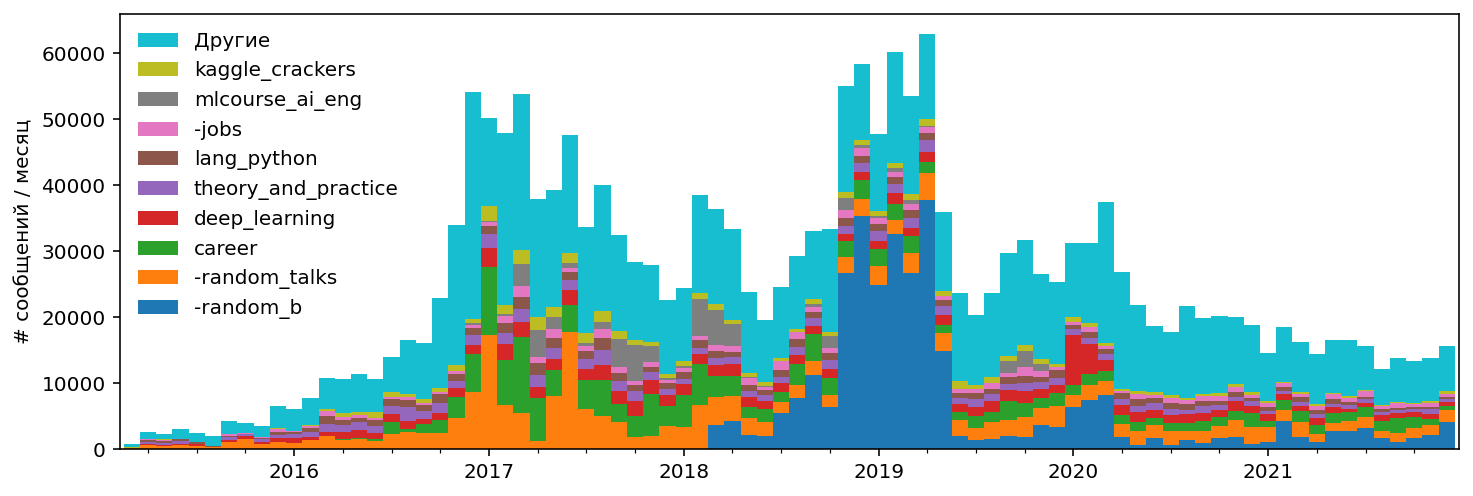

In [457]:
%run -n main.py
plot_events(events)

## city

In [255]:
%run -n main.py
count_top_cities(message_matches)

[('Москва', 2329),
 ('Санкт-Петербург', 378),
 ('Минск', 134),
 ('Киев', 79),
 ('Лондон', 76),
 ('Новосибирск', 67),
 ('Амстердам', 39),
 ('Иннополис', 26),
 ('Нью-Йорк', 17),
 ('Уфа', 3)]

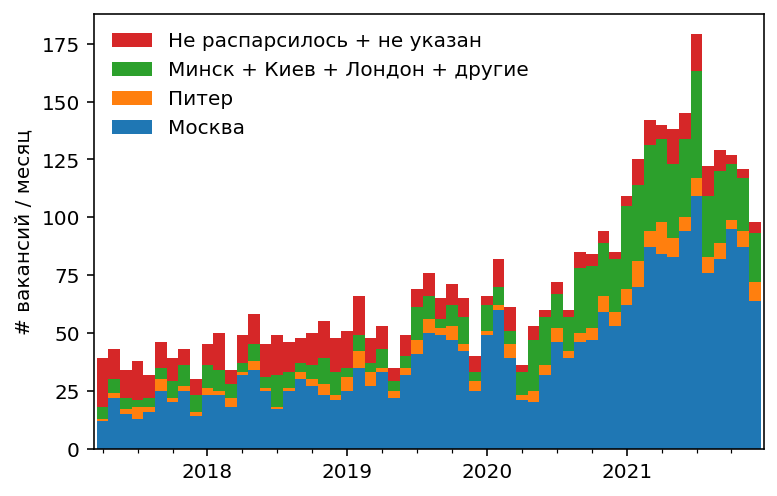

In [256]:
%run -n main.py
plot_city(message_matches)

## remote

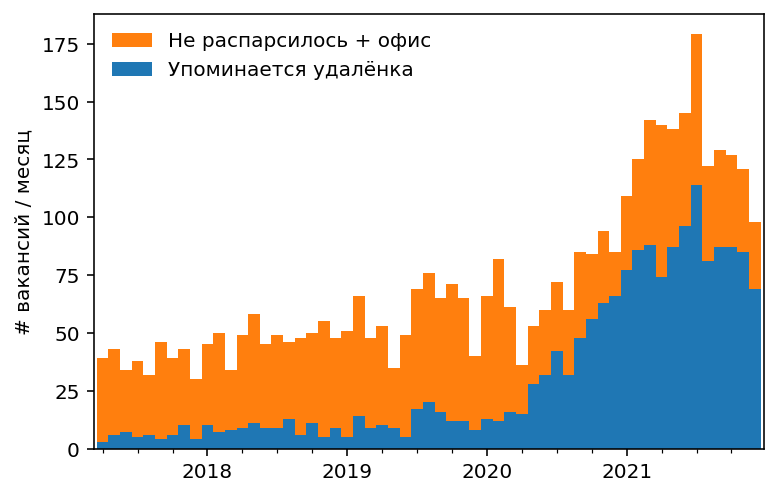

In [257]:
%run -n main.py
plot_remote(message_matches)

## grade

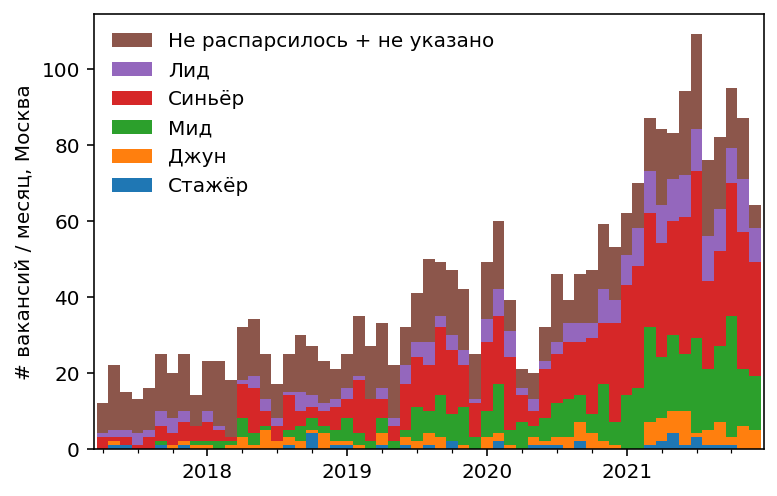

In [258]:
%run -n main.py
plot_grades(message_matches)

## vilka grade

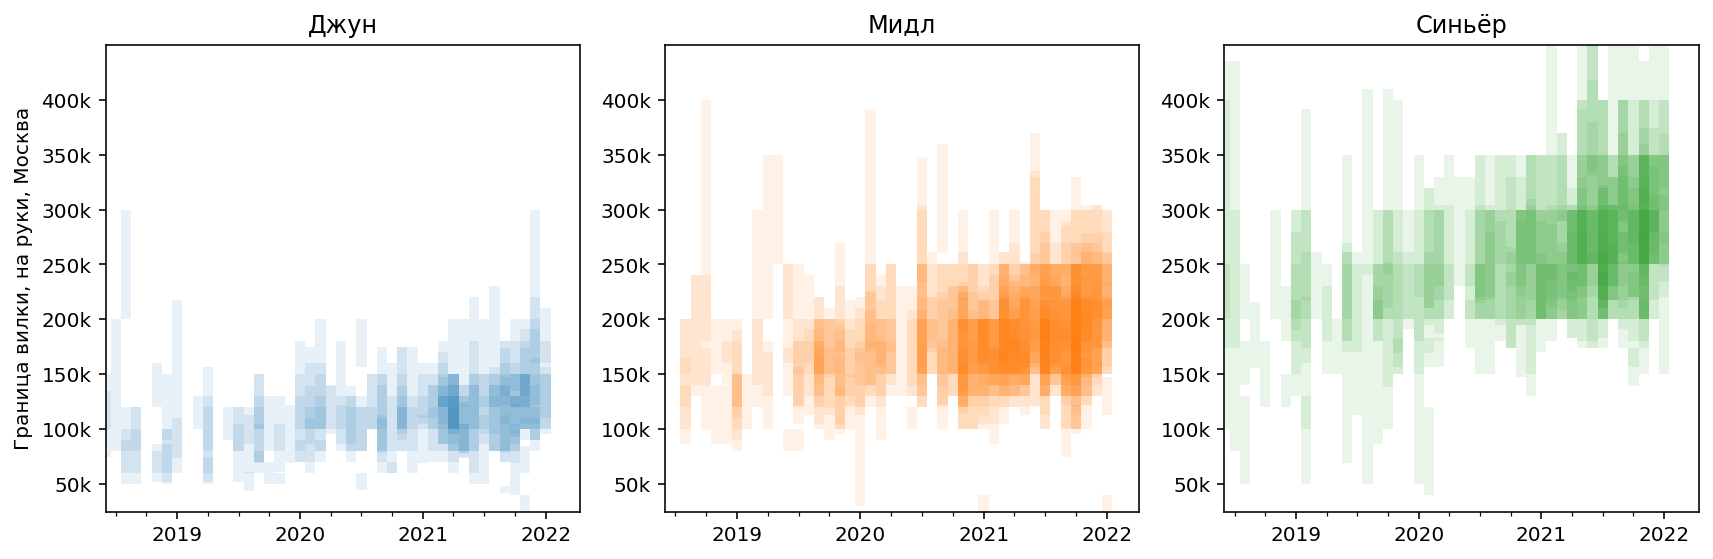

In [402]:
%run -n main.py
plot_vilkas(message_matches)

## company

In [470]:
%run -n main.py
count_top_msk_companies(message_matches)

[('sberbank.ru', 456),
 ('yandex-team.ru', 97),
 ('ozon.ru', 64),
 ('x5.ru', 53),
 ('tinkoff.ru', 47),
 ('alfabank.ru', 41),
 ('mts.ru', 32),
 ('raiffeisen.ru', 29),
 ('sbdagroup.com', 25),
 ('vtb.ru', 24),
 ('corp.mail.ru', 21),
 ('open.ru', 20),
 ('beeline.ru', 19),
 ('lenta.ru', 19),
 ('leroymerlin.ru', 17),
 ('skoltech.ru', 16),
 ('huawei.com', 16),
 ('homecredit.ru', 14),
 ('rt.ru', 14),
 ('s7.ru', 12)]

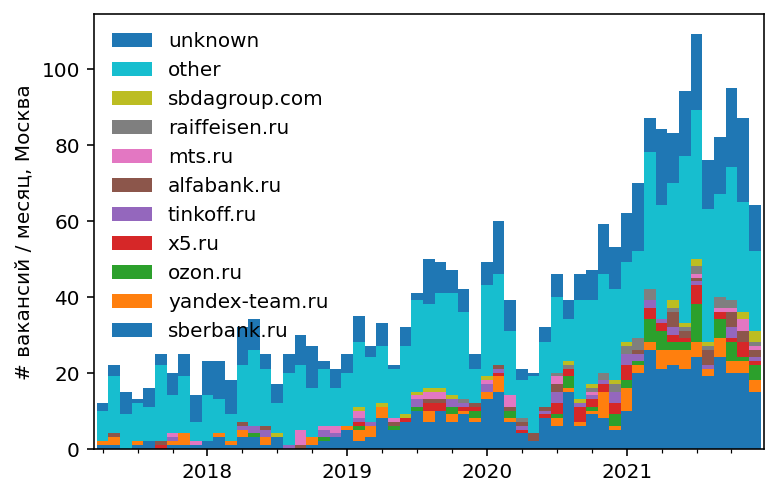

In [471]:
%run -n main.py
plot_company(message_matches)

In [484]:
selected = [
    'sberbank.ru',
    'yandex-team.ru',

    'ozon.ru',
    'x5.ru',

    'tinkoff.ru',
    'alfabank.ru',
    'vtb.ru',

    'mts.ru',
    'beeline.ru',
]


counts = Counter()
for message, matches in message_matches:
    city = matches_city(matches)
    if city != MSK:
        continue

    company = matches_company(matches)
    if not company:
        continue

    grades = matches_grades(matches)
    vilkas = matches_vilkas(matches)

    if gralen(grades) == len(vilkas) and bool(grades)
    if flag:
        counts[company] += 1

#     if company in selected:
#         index += 1
#         print(index)
#         print(company)
#         show_markup(message.text, matches)
#         print('----\n\n\n')



In [485]:
counts.most_common(20)

[('sberbank.ru', 194),
 ('tinkoff.ru', 34),
 ('yandex-team.ru', 30),
 ('raiffeisen.ru', 21),
 ('ozon.ru', 20),
 ('x5.ru', 17),
 ('alfabank.ru', 16),
 ('mts.ru', 15),
 ('vtb.ru', 15),
 ('rt.ru', 12),
 ('beeline.ru', 9),
 ('lenta.ru', 9),
 ('ntechlab.com', 8),
 ('sbdagroup.com', 7),
 ('s7.ru', 7),
 ('corp.mail.ru', 6),
 ('skoltech.ru', 6),
 ('platformaofd.ru', 6),
 ('hipasus.com', 6),
 ('replika.ai', 5)]

In [482]:
for company in selected:
    print(company, counts[company])

sberbank.ru Counter({False: 262, True: 194})
yandex-team.ru Counter({False: 67, True: 30})
corp.mail.ru Counter({False: 15, True: 6})
huawei.com Counter({False: 15, True: 1})
ozon.ru Counter({False: 44, True: 20})
x5.ru Counter({False: 36, True: 17})
lenta.ru Counter({False: 10, True: 9})
tinkoff.ru Counter({True: 34, False: 13})
alfabank.ru Counter({False: 25, True: 16})
homecredit.ru Counter({False: 11, True: 3})
open.ru Counter({False: 16, True: 4})
mts.ru Counter({False: 17, True: 15})
beeline.ru Counter({False: 10, True: 9})
